<a href="https://colab.research.google.com/github/TheNobody-12/SCL-MEITy-Project-2022/blob/main/ALEXNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-layer-normalization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4668 sha256=290c0fe8a453580a51b55696c9d3b5a0c3bc1805fcd3b2008adfbcb3750a457f
  Stored in directory: /root/.cache/pip/wheels/85/5d/1c/2e619f594f69fbcf8bc20943b27d414871c409be053994813e
Successfully built keras-layer-normalization


In [ ]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(100,100,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(100,100,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(6))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
# AlexNet.summary()

In [ ]:
AlexNet.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
import pickle
X =pickle.load(open("/content/drive/MyDrive/Xnew2.pkl", "rb"))
Y =pickle.load(open("/content/drive/MyDrive/Ynew2.pkl", "rb"))
X=X/255
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

#Defining the parameters
batch_size= 100
epochs=50
learn_rate=.001
#Training the model
final = AlexNet.fit(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = len(x_train)//batch_size,validation_steps = len(x_test)//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), callbacks = [lrr], verbose=1)

((3315, 100, 100, 3), (3315,))
((1421, 100, 100, 3), (1421,))
((527, 100, 100, 3), (527,))
((3315, 100, 100, 3), (3315, 6))
((1421, 100, 100, 3), (1421, 6))
((527, 100, 100, 3), (527, 6))
Epoch 1/50
33/33 [==============================] - 177s 5s/step - loss: 1.4679 - accuracy: 0.4563 - val_loss: 13.6353 - val_accuracy: 0.2920 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 165s 5s/step - loss: 1.1359 - accuracy: 0.6128 - val_loss: 2.1568 - val_accuracy: 0.2740 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 166s 5s/step - loss: 1.0676 - accuracy: 0.6541 - val_loss: 1.5530 - val_accuracy: 0.3880 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 174s 5s/step - loss: 0.9227 - accuracy: 0.7089 - val_loss: 1.6192 - val_accuracy: 0.3940 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 171s 5s/step - loss: 0.8125 - accuracy: 0.7655 - val_loss: 1.7504 - val_accuracy: 0.3440 - lr: 0.0010
Epoch 6/50
33/33 [=======================

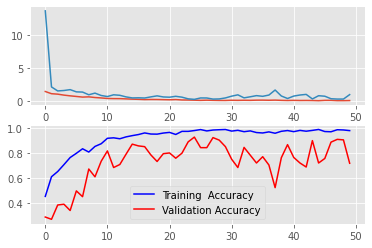

In [ ]:
#After successful training, we will visualize its performance.

import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(final.history['loss'],label='Training Loss')
ax[0].plot(final.history['val_loss'],label='Validation Loss')
#Plotting the training accuracy and validation accuracy
ax[1].plot(final.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(final.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()
plt.savefig("ALEXNET_FINAL.png") 

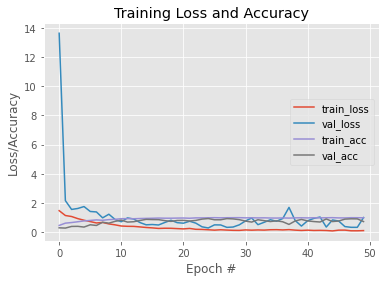

In [ ]:
#After successful training, we will visualize its performance.
# plot the training loss and accuracy
import matplotlib.pyplot as plt
N = 50
plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, N), final.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), final.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), final.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), final.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("ALEXNETFINAL.png") 

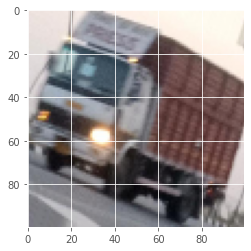

[False, False, False, False, False, True]
Truck


In [ ]:
import random
import matplotlib.pyplot as plt
import cv2
idx2 = random.randint(0, len(y_test)-1)
plt.imshow(x_train[idx2, :])
plt.show()

y_pred = AlexNet.predict(x_train[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
y_pred
list_pred = y_pred.tolist()
list1 = list_pred[0]
print(list1)
if list1[0] == True:
  print("Auto")
elif list1[1] == True:
  print("Bus")
elif list1[2] == True:
  print( "Car")
elif list1[3] == True:
  print("Tempo")
elif list1[4] == True:
  print("Tractor")
elif list1[5] == True:
  print("Truck")
else:
  print("Don't Know")


In [ ]:
# AlexNet.save('/content/drive/MyDrive/AlexNet_final1.h5')
AlexNet.evaluate(x_test,y_test)

17/17 [==============================] - 6s 369ms/step - loss: 0.9596 - accuracy: 0.7324


[0.9596344232559204, 0.7324478030204773]

KeyError: ignored

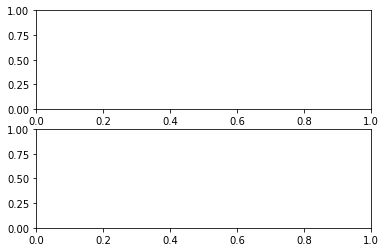

In [ ]:
# AlexNet.save('/content/drive/MyDrive/AlexNet_new1.h5')


In [ ]:
from keras.models import load_model
Alexnet = load_model('/content/drive/MyDrive/AlexNet_new1.h5')

In [ ]:
import pickle
X =pickle.load(open("/content/drive/MyDrive/Xnew2.pkl", "rb"))
Y =pickle.load(open("/content/drive/MyDrive/Ynew2.pkl", "rb"))
X=X/255
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
Alexnet.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10


ValueError: ignored

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)
# In the next step, we will predict the class labels for the test images using the trained AlexNet model.

#Making prediction
y_pred=Alexnet.predict(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

plt.legend()


ValueError: ignored